Importing

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [3]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training

In [6]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
    case 'ResNet':
        model = MRI_ResNet
    case 'ResNet2':
        model = MRI_ResNet2
    case 'AlexNet':
        model = MRI_AlexNet
    case _:
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [7]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:  10%|█         | 1/10 [00:17<02:36, 17.41s/epoch]

Epoch [1/10] Train Loss: 1.3069 Train Accuracy: 40.71% Validation Loss: 1.3122 Validation Accuracy: 43.78%


Training:  20%|██        | 2/10 [00:30<01:58, 14.86s/epoch]

Epoch [2/10] Train Loss: 0.9458 Train Accuracy: 60.53% Validation Loss: 0.9231 Validation Accuracy: 60.58%


Training:  30%|███       | 3/10 [00:41<01:33, 13.32s/epoch]

Epoch [3/10] Train Loss: 0.7486 Train Accuracy: 70.01% Validation Loss: 0.7273 Validation Accuracy: 71.73%


Training:  40%|████      | 4/10 [00:53<01:15, 12.52s/epoch]

Epoch [4/10] Train Loss: 0.5188 Train Accuracy: 79.38% Validation Loss: 0.7880 Validation Accuracy: 69.79%


Training:  50%|█████     | 5/10 [01:04<01:00, 12.10s/epoch]

Epoch [5/10] Train Loss: 0.3311 Train Accuracy: 87.51% Validation Loss: 0.7609 Validation Accuracy: 76.09%


Training:  60%|██████    | 6/10 [01:16<00:47, 11.96s/epoch]

Epoch [6/10] Train Loss: 0.2076 Train Accuracy: 93.05% Validation Loss: 0.8536 Validation Accuracy: 75.12%


Training:  70%|███████   | 7/10 [01:28<00:36, 12.06s/epoch]

Epoch [7/10] Train Loss: 0.1157 Train Accuracy: 95.91% Validation Loss: 0.7382 Validation Accuracy: 79.00%


Training:  80%|████████  | 8/10 [01:39<00:23, 11.76s/epoch]

Epoch [8/10] Train Loss: 0.0759 Train Accuracy: 97.04% Validation Loss: 0.9063 Validation Accuracy: 79.16%


Training:  90%|█████████ | 9/10 [01:50<00:11, 11.55s/epoch]

Epoch [9/10] Train Loss: 0.0528 Train Accuracy: 98.44% Validation Loss: 0.9578 Validation Accuracy: 80.29%


Training: 100%|██████████| 10/10 [02:02<00:00, 12.26s/epoch]

Epoch [10/10] Train Loss: 0.0284 Train Accuracy: 99.35% Validation Loss: 0.9982 Validation Accuracy: 79.97%


In [8]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  10%|█         | 1/10 [00:01<00:13,  1.45s/epoch]

Testing Epoch [1/10] Test Loss: 1.0295 Test Accuracy: 78.06% Time per Epoch: 1.44 seconds


Testing:  20%|██        | 2/10 [00:02<00:11,  1.46s/epoch]

Testing Epoch [2/10] Test Loss: 1.0524 Test Accuracy: 78.06% Time per Epoch: 1.46 seconds


Testing:  30%|███       | 3/10 [00:04<00:10,  1.45s/epoch]

Testing Epoch [3/10] Test Loss: 1.0582 Test Accuracy: 78.06% Time per Epoch: 1.44 seconds


Testing:  40%|████      | 4/10 [00:05<00:08,  1.43s/epoch]

Testing Epoch [4/10] Test Loss: 1.0301 Test Accuracy: 78.06% Time per Epoch: 1.40 seconds


Testing:  50%|█████     | 5/10 [00:07<00:07,  1.42s/epoch]

Testing Epoch [5/10] Test Loss: 1.0238 Test Accuracy: 78.06% Time per Epoch: 1.40 seconds


Testing:  60%|██████    | 6/10 [00:08<00:05,  1.42s/epoch]

Testing Epoch [6/10] Test Loss: 1.0436 Test Accuracy: 78.06% Time per Epoch: 1.41 seconds


Testing:  70%|███████   | 7/10 [00:09<00:04,  1.42s/epoch]

Testing Epoch [7/10] Test Loss: 1.0232 Test Accuracy: 78.06% Time per Epoch: 1.41 seconds


Testing:  80%|████████  | 8/10 [00:11<00:02,  1.42s/epoch]

Testing Epoch [8/10] Test Loss: 1.0294 Test Accuracy: 78.06% Time per Epoch: 1.42 seconds


Testing:  90%|█████████ | 9/10 [00:12<00:01,  1.42s/epoch]

Testing Epoch [9/10] Test Loss: 1.0347 Test Accuracy: 78.06% Time per Epoch: 1.43 seconds


Testing: 100%|██████████| 10/10 [00:14<00:00,  1.44s/epoch]

Testing Epoch [10/10] Test Loss: 1.0792 Test Accuracy: 78.06% Time per Epoch: 1.54 seconds
Average Test Loss: 1.0404
Average Test Accuracy: 78.06%


Model Classification:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       546
           1       0.99      0.99      0.99       560
           2       0.99      0.99      0.99       254
           3       1.00      1.00      1.00       497

    accuracy                           0.99      1857
   macro avg       0.99      0.99      0.99      1857
weighted avg       0.99      0.99      0.99      1857

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       169
           1       0.74      0.70      0.72       175
           2       0.74      0.84      0.78        97
           3       0.85      0.94      0.89       178

    accuracy                           0.80       619
   macro avg       0.79      0.80      0.80       619
weighted avg       0.80      0.80      0.80       619

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       186
           1       0.

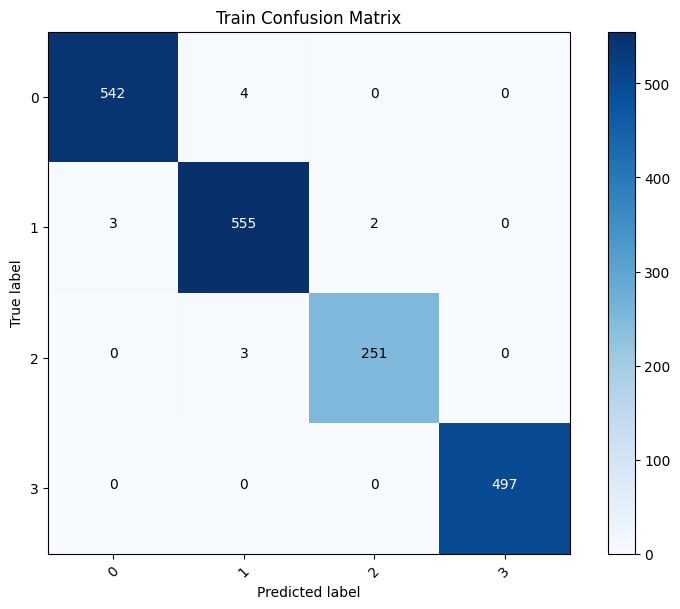

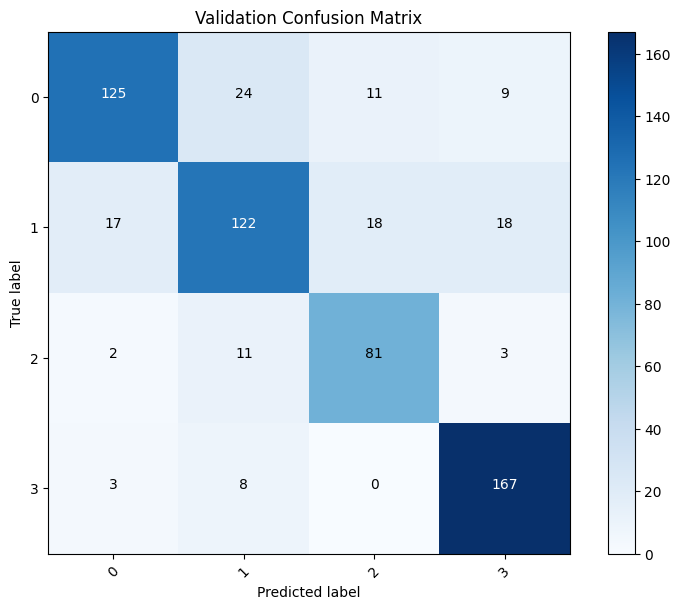

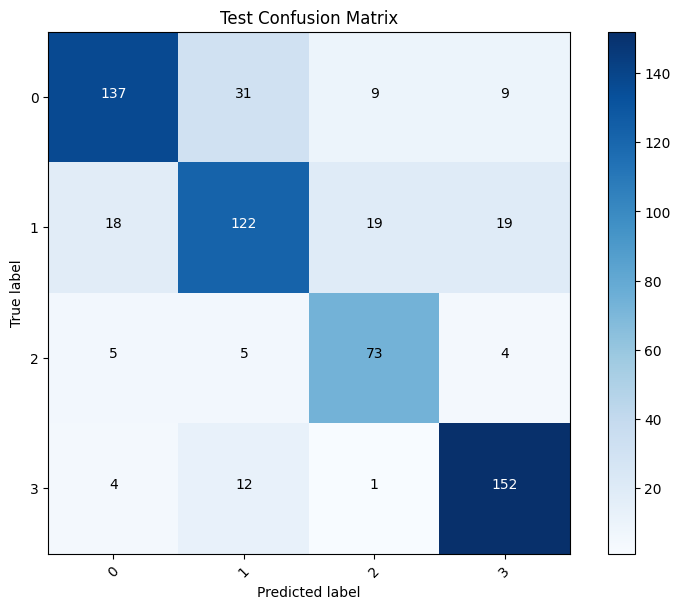

In [9]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()